# Test scikit-image structural similarity between Web GUIs

## Import libraries

In [1]:
from skimage.metrics import structural_similarity
import cv2
import matplotlib.pyplot as plt

## Images loading and processing

In [2]:
# Set images paths
IMAGE_A_PATH = "img1_original.png"
IMAGE_B_PATH = "img1_modified.png"

In [3]:
# Load images
imageA = cv2.imread("data/" + IMAGE_A_PATH)
imageB = cv2.imread("data/" + IMAGE_B_PATH)

# Make the two images dimensions match
imageB = cv2.resize(imageB, (imageA.shape[1], imageA.shape[0]))

imageA_gray = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
imageB_gray = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)


## Display processed images

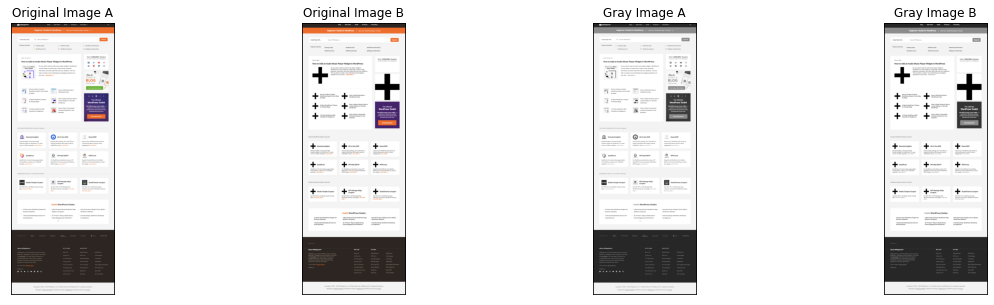

In [4]:
# Display the images
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Show original images
axs[0].imshow(cv2.cvtColor(imageA, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image A')
axs[1].imshow(cv2.cvtColor(imageB, cv2.COLOR_BGR2RGB))
axs[1].set_title('Original Image B')

# Show images after converting to grayscale
axs[2].imshow(imageA_gray, cmap='gray')
axs[2].set_title('Gray Image A')
axs[3].imshow(imageB_gray, cmap='gray')
axs[3].set_title('Gray Image B')

# Remove the x and y ticks
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

## Calculate and print structural similarity

In [5]:
# Compute SSIM between two images
ssim_score = structural_similarity(imageA_gray, imageB_gray)

print(f"Image similarity score: {ssim_score:.3f}")

Image similarity score:  0.7167694376059656
